In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
len(df)

768

In [4]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.isnull().values.any()

False

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

##removing unwanted columns

In [9]:
feature_colum=['Pregnancies', 'Glucose','SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x=df[feature_colum]
y=df['Outcome']

In [10]:
x.shape , y.shape

((768, 7), (768,))

### split data into train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
X_train.shape ,x_test.shape

((614, 7), (154, 7))

##Building model

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf=clf.fit(X_train,y_train)

In [49]:
y_pred=clf.predict(x_test)

##model evaluation

In [50]:

from sklearn import metrics

In [51]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7987012987012987


In [53]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test,y_pred)

array([[88, 11],
       [20, 35]])

##text representation of decision tree ¶

In [60]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 127.50
|   |--- feature_4 <= 26.45
|   |   |--- feature_4 <= 9.10
|   |   |   |--- class: 0
|   |   |--- feature_4 >  9.10
|   |   |   |--- class: 0
|   |--- feature_4 >  26.45
|   |   |--- feature_6 <= 28.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  28.50
|   |   |   |--- class: 0
|--- feature_1 >  127.50
|   |--- feature_1 <= 166.50
|   |   |--- feature_4 <= 29.95
|   |   |   |--- class: 0
|   |   |--- feature_4 >  29.95
|   |   |   |--- class: 1
|   |--- feature_1 >  166.50
|   |   |--- feature_1 <= 172.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  172.50
|   |   |   |--- class: 1



## tree visualization using  graph viz

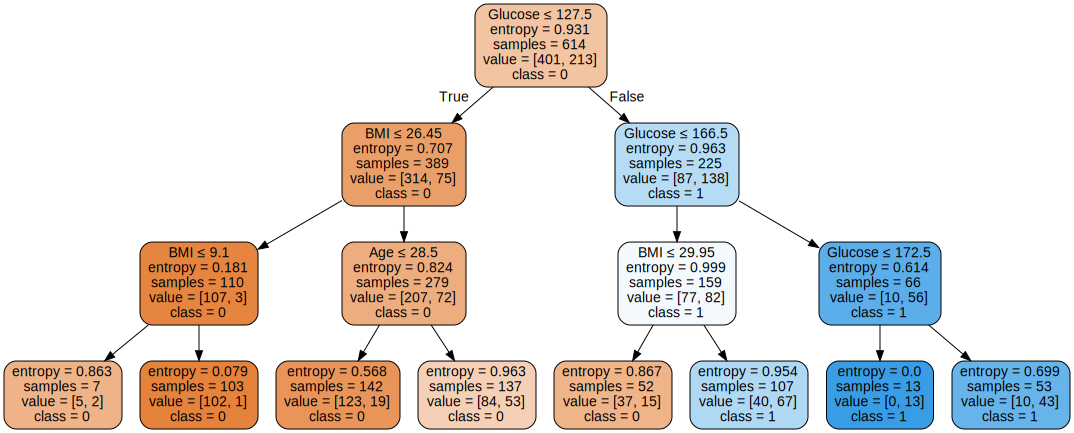

In [66]:
import graphviz
dot_data=tree.export_graphviz(clf,feature_names=feature_colum,
                              class_names=["0", "1"],
                             out_file=None,
                                filled=True,
                                rounded=True,
                             special_characters=True)  
graph = graphviz.Source(dot_data)
graph